# Teste 1 para Computer Scientist na Jacto Agrícola

# Análise de dados e Criação de Modelos de Machine Learning para a Identificação de Pragas em Colheitas

## 1 - Importação das bibliotecas:

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.externals import joblib
import statistics
import warnings
warnings.filterwarnings('ignore')

----------------------

## 2 - Definição dos parâmetros dos Datasets e leitura dos arquivos:

In [24]:
# Nome dos arquivos que serão lidos
amargoso = 'data/_amargoso.csv'
braquiaria = 'data/_braquiaria.csv'
caruru = 'data/_caruru.csv'
juazeiro = 'data/_juazeiro.csv'
leiteiro = 'data/_leiteiro.csv'

# Criação dos Dataframes
df_amargoso = pd.read_csv(amargoso, sep=',')
df_braquiaria = pd.read_csv(braquiaria, sep=',')
df_caruru = pd.read_csv(caruru, sep=',')
df_juazeiro = pd.read_csv(juazeiro, sep=',')
df_leiteiro = pd.read_csv(leiteiro, sep=',')

# Renomear as colunas dos Dataframes:
vec_dfs = [df_amargoso, df_braquiaria, df_caruru, df_juazeiro, df_leiteiro]

for df in vec_dfs:
    df.rename(columns={'Sample num' : 'id', 'F1 (410nm)' : 'f1', 'F2 (440nm)' : 'f2', 
                       'F3 (470nm)' : 'f3', 'F4 (510nm)' : 'f4', 'F5 (550nm)' : 'f5', 
                       'F6 (583nm)' : 'f6', 'F7 (620nm)' : 'f7', 'F8 (670nm)' : 'f8', 
                       'CLEAR' : 'clear', 'SAIDA' : 'y'}, inplace = True)
    df.drop('Function', axis=1, inplace=True)

In [25]:
# Tipos de pragas
# - 0 = Amargoso
# - 1 = Caruru
# - 2 = Juazeiro
# - 3 = Leiteiro
# - 4 = Braquiaria

df_amargoso['tipo'] = '0'
df_caruru['tipo'] = '1'
df_juazeiro['tipo'] = '2'
df_leiteiro['tipo'] = '3'
df_braquiaria['tipo'] = '4'

---------------------

## 3 - Pré-processamento dos dados

In [26]:
# Converter dados de Inteiro e Object para Float
def converter_colunas_float(df):
    df['f1'] = df.f1.astype(np.float64)
    df['f2'] = df.f2.astype(np.float64)
    df['f3'] = df.f3.astype(np.float64)
    df['f4'] = df.f4.astype(np.float64)
    df['f5'] = df.f5.astype(np.float64)
    df['f6'] = df.f6.astype(np.float64)
    df['f7'] = df.f7.astype(np.float64)
    df['f8'] = df.f8.astype(np.float64)
    df['clear'] = pd.to_numeric(df['clear'],errors='coerce')
    df['y'] = df.y.astype(np.float64)
    df['tipo'] = df.tipo.astype(np.float64)
    
    return df

In [27]:
# Dados Faltantes
# - Verificação da existência de dados faltantes
# - - Substituição de dados faltantes pelo o valor obtido com interpolação linear

def inserir_dados_faltantes(df):
    if df['f1'].isna().any():
        df['f1'] = df.f1.interpolate(method='linear')
    if df['f2'].isna().any():
        df['f2'] = df.f2.interpolate(method='linear')
    if df['f3'].isna().any():
        df['f3'] = df.f3.interpolate(method='linear')
    if df['f4'].isna().any():
        df['f4'] = df.f4.interpolate(method='linear')
    if df['f5'].isna().any():
        df['f5'] = df.f5.interpolate(method='linear')
    if df['f6'].isna().any():
        df['f6'] = df.f6.interpolate(method='linear')
    if df['f7'].isna().any():
        df['f7'] = df.f7.interpolate(method='linear')
    if df['f8'].isna().any():
        df['f8'] = df.f8.interpolate(method='linear')
    if df['clear'].isna().any():
        df['clear'] = df.clear.interpolate(method='linear')
    
    return df

In [28]:
# Vetor de Dataframes
vec_dfs = [df_amargoso,df_braquiaria,df_caruru, df_juazeiro, df_leiteiro]

vec_df_preprocessados = []

for df in vec_dfs:
    
    # Converter os dados para float
    df = converter_colunas_float(df)

    # Inserir os dados faltantes via interpolação linear
    df = inserir_dados_faltantes(df)
    
    # Inserir os Dataframes Pré-processados em um vetor
    vec_df_preprocessados.append(df)

# Concatenar todos os Dataframes
df_preprocessado = pd.concat(vec_df_preprocessados)

# Resetar o index do Dataframe
df_preprocessado = df_preprocessado.reset_index()

# Seleção dos parâmetros mais interessantes
df_preprocessado = df_preprocessado[['f1','f2','f3','f4','f5','f6','f7','f8','clear','y','tipo']]

# Salvar o DataFrame Pré-processado
df_preprocessado.to_csv('data/df_preprocessado.csv')

In [29]:
# - Informações relevantes sobre os dados pré-processados
print('-------Total de Linhas do Dataframe Pré-processado-------')
print(len(df_preprocessado))
print('-------Pré-visualização dos dados do Dataframe-------')
print(df_preprocessado.head())
print('-------Descrição dos tipos das variáveis contidas no Dataframe-------')
print(df_preprocessado.dtypes)
print('-------Descrição do Dataframe-------')
print(df_preprocessado.describe())

-------Total de Linhas do Dataframe Pré-processado-------
637
-------Pré-visualização dos dados do Dataframe-------
      f1     f2     f3     f4     f5     f6      f7      f8   clear    y  tipo
0  366.0  471.0  632.0  796.0  999.0  967.0  1326.0  1532.0  7318.0  1.0   0.0
1  336.0  459.0  595.0  811.0  987.0  953.0  1356.0  1478.0  7284.0  1.0   0.0
2  333.0  470.0  610.0  849.0  992.0  958.0  1472.0  1487.0  7427.0  1.0   0.0
3  337.0  453.0  589.0  774.0  933.0  949.0  1316.0  1406.0  6916.0  1.0   0.0
4  329.0  454.0  585.0  783.0  948.0  951.0  1311.0  1490.0  6953.0  1.0   0.0
-------Descrição dos tipos das variáveis contidas no Dataframe-------
f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
clear    float64
y        float64
tipo     float64
dtype: object
-------Descrição do Dataframe-------
               f1          f2          f3           f4           f5  \
count  637.000000  637.000000  

-------------------

## 4 - Análise de dados

In [30]:
# Correlação entre os dados
# - Fazer a correlação de Pearson para verificar a se há correlação entre os dados.
# - - - - - - - - - - Níveis de Correlação - - - - - - - - -
# - - 0.9 para mais ou para menos indica uma correlação muito forte.
# - - 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
# - - 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# - - 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
# - - 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Realizar a correlação entre as colunas
df_correlacao  = df_preprocessado.corr(method ='pearson')

## HeatMap

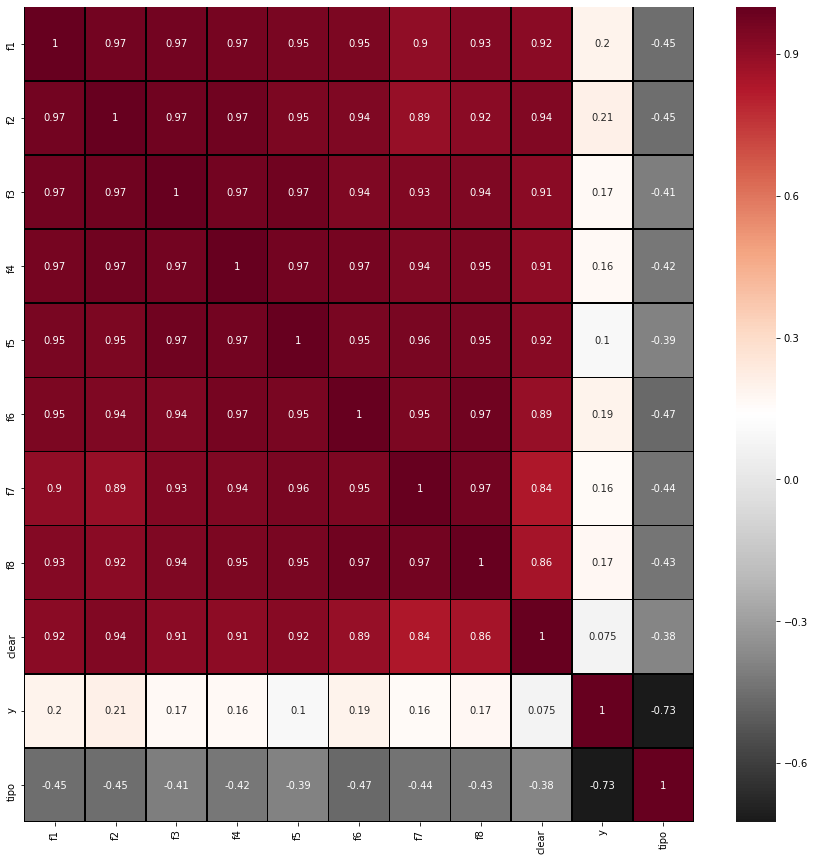

In [31]:
# Visualização das correlações entre das labels do Dataframe através de um heatmap:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(df_correlacao, annot=True, linewidths=0.5, linecolor='black', cmap='RdGy_r')
plt.xticks(rotation=90)
plt.savefig("heatmap_correlation.png", dpi=150) 
plt.show()

Conclusão: As features de "f1" até "clear" possuem uma correlação forte, logo isso é um bom indício que essas features são relacionadas, no entanto, como na base de dados possui poucos exemplos balanceados, ou seja há aproximadamente 120 casos do tipo braquiaria e mais de 500 casos de exemplos de dados com praga, logo isso impacta na correlação das features com as saídas.

-----------------------

## 5 - Criação do conjunto verdade 

### 5.1 - Solução para a identificação de pragas

In [32]:
# Resetar o index do Dataframe
df_preprocessado = df_preprocessado.reset_index()

-------------

### 5.1.1 Criação do conjunto de teste

In [33]:
# Selecionar as features necessárias
df_preprocessado_conj_vdd = df_preprocessado[['index','f1','f2','f3','f4','f5','f6','f7','f8','clear','y']]

# vetor de bases com y = 0 e y = 1
vec_conjunto_vdd = []

# Dados do Dataframe que a label "y" é 0
df_process_y0 = df_preprocessado_conj_vdd[df_preprocessado_conj_vdd['y'] == 0.0]

df_process_y0 = df_process_y0.sample(n = 13, random_state=1)

vec_conjunto_vdd.append(df_process_y0)

# Dados do Dataframe que a label "y" é 1
df_process_y1 = df_preprocessado_conj_vdd[df_preprocessado_conj_vdd['y'] == 1.0]

df_process_y1 = df_process_y1.sample(n = 13, random_state=1)

# vetor com o conjunto verdade balanceado
vec_conjunto_vdd.append(df_process_y1)

# Planejamento do conjunto de treinamento
# - 10% da base com menor frequência
# - Base com menor frequência = 128
# - Conjunto verdade = 13*2

vec_df_vdd = pd.concat(vec_conjunto_vdd)

print(vec_df_vdd)

vec_df_vdd.to_csv('data/conj_vdd_teste_identificacao_praga.csv')

     index     f1     f2     f3      f4      f5      f6      f7      f8  \
246    246  279.0  354.0  480.0   567.0   764.0   706.0   876.0   974.0   
229    229  268.0  336.0  446.0   549.0   715.0   700.0   842.0   954.0   
180    180  269.0  382.0  483.0   664.0   774.0   850.0  1083.0  1308.0   
181    181  326.0  423.0  583.0   737.0   929.0  1029.0  1248.0  1512.0   
158    158  244.0  300.0  373.0   511.0   615.0   692.0   734.0   884.0   
243    243  272.0  347.0  471.0   559.0   744.0   701.0   851.0   957.0   
247    247  279.0  357.0  476.0   568.0   751.0   707.0   877.0   986.0   
160    160  262.0  315.0  399.0   547.0   659.0   757.0   837.0   997.0   
156    156  232.0  279.0  355.0   484.0   572.0   631.0   696.0   795.0   
176    176  252.0  316.0  398.0   534.0   665.0   705.0   779.0   930.0   
233    233  263.0  333.0  438.0   541.0   707.0   704.0   813.0   947.0   
228    228  265.0  331.0  441.0   542.0   714.0   699.0   832.0   947.0   
129    129  322.0  447.0 

----------------

### 5.1.2 - Criação do conjunto para treinamento

In [34]:
# Ids do conjunto de teste
ids = vec_df_vdd['index'].values

# Conjunto de treino sem a ocorrência dos exemplos usados no teste
df_conjunto_treino = df_preprocessado[~df_preprocessado['index'].isin(ids)]

df_conjunto_treino = df_conjunto_treino[['index','f1','f2','f3','f4','f5','f6','f7','f8','clear','y']]

# vetor de bases com y = 0 e y = 1
vec_conjunto_treino = []

# Dados do Dataframe que a label "y" é 0
df_process_y0_treino = df_conjunto_treino[df_conjunto_treino['y'] == 0.0]

df_process_y0_treino = df_process_y0_treino.sample(n = 115, random_state=1)

vec_conjunto_treino.append(df_process_y0_treino)

# Dados do Dataframe que a label "y" é 1
df_process_y1_treino = df_conjunto_treino[df_conjunto_treino['y'] == 1.0]

df_process_y1_treino = df_process_y1_treino.sample(n = 115, random_state=1)

vec_conjunto_treino.append(df_process_y1_treino)

In [35]:
# Planejamento do conjunto de treinamento
# - 90% da base com menor frequência
# - Base com menor frequência = 128
# - Conjunto de treino = 115*2

vec_conjunto_treino = pd.concat(vec_conjunto_treino)

print(vec_conjunto_treino)

vec_conjunto_treino.to_csv('data/conj_vdd_treino_identificacao_praga.csv')

     index     f1     f2     f3     f4      f5      f6      f7      f8  \
226    226  265.0  329.0  438.0  544.0   703.0   706.0   824.0   954.0   
173    173  273.0  333.0  417.0  573.0   698.0   752.0   813.0  1005.0   
188    188  304.0  416.0  497.0  663.0   781.0   819.0   914.0  1145.0   
215    215  272.0  338.0  453.0  568.0   724.0   722.0   859.0   970.0   
201    201  282.0  339.0  453.0  557.0   742.0   753.0   844.0   977.0   
..     ...    ...    ...    ...    ...     ...     ...     ...     ...   
558    558  269.0  345.0  426.0  565.0   682.0   761.0   822.0  1028.0   
371    371  426.0  567.0  761.0  823.0  1009.0  1150.0  1179.0  1528.0   
429    429  314.0  439.0  550.0  706.0   842.0   873.0  1003.0  1236.0   
442    442  347.0  432.0  531.0  702.0   795.0   852.0   884.0  1093.0   
528    528  243.0  302.0  393.0  511.0   630.0   678.0   790.0   937.0   

      clear    y  
226  5122.0  0.0  
173  4505.0  0.0  
188  5634.0  0.0  
215  5265.0  0.0  
201  5710.0  0.0

----------------

### 5.2 - Solução para a identificação de qual tipo de praga

### 5.2.1 - Criação do conjunto para teste

In [36]:
# Selecionar as features necessárias
df_preprocessado_conj_vdd_praga = df_preprocessado[['index','f1','f2','f3','f4','f5','f6','f7','f8','clear','tipo']]

# vetor de bases com tipo = 0, tipo = 1, tipo = 2, tipo = 3
vec_conjunto_vdd_praga = []

# Dados do Dataframe que a label "tipo" é 0
df_process_tipo0 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 0.0]

df_process_tipo0 = df_process_tipo0.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo0)

#------------------------------------------

# Dados do Dataframe que a label "tipo" é 1
df_process_tipo1 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 1.0]

df_process_tipo1 = df_process_tipo1.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo1)

#------------------------------------------

# Dados do Dataframe que a label "tipo" é 2
df_process_tipo2 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 2.0]

df_process_tipo2 = df_process_tipo2.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo2)

#------------------------------------------

# Dados do Dataframe que a label "tipo" é 3
df_process_tipo3 = df_preprocessado_conj_vdd_praga[df_preprocessado_conj_vdd_praga['tipo'] == 3.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo3 = df_process_tipo3.sample(n = 8, random_state=1)

vec_conjunto_vdd_praga.append(df_process_tipo3)

# Planejamento do conjunto de teste
# - 10% da base com menor frequência
# - Base com menor frequência = 72
# - Conjunto de teste = 8*4

vec_conjunto_teste_praga = pd.concat(vec_conjunto_vdd_praga)

print(vec_conjunto_teste_praga)

vec_conjunto_teste_praga.to_csv('data/conj_vdd_teste_identificacao_tipo_praga.csv')


     index     f1     f2     f3      f4      f5      f6      f7      f8  \
74      74  378.0  480.0  591.0   736.0   931.0  1014.0  1076.0  1303.0   
45      45  349.0  452.0  561.0   718.0   862.0   933.0  1014.0  1339.0   
48      48  334.0  535.0  545.0   870.0   843.0  1138.0  1374.0  1363.0   
31      31  289.0  348.0  446.0   596.0   724.0   862.0  1016.0  1186.0   
65      65  392.0  504.0  652.0   765.0   984.0  1103.0  1105.0  1377.0   
66      66  365.0  482.0  573.0   732.0   870.0  1018.0   976.0  1284.0   
118    118  350.0  468.0  577.0   709.0   841.0   981.0  1021.0  1262.0   
100    100  299.0  425.0  493.0   709.0   788.0   954.0   942.0  1209.0   
272    272  452.0  597.0  820.0   936.0  1180.0  1257.0  1628.0  2043.0   
308    308  430.0  535.0  691.0   952.0  1095.0  1248.0  1579.0  1795.0   
263    263  438.0  580.0  775.0   956.0  1221.0  1266.0  1636.0  2038.0   
321    321  437.0  528.0  691.0   885.0  1044.0  1197.0  1491.0  1786.0   
306    306  407.0  521.0 

--------------------

### 5.2.2 - Criação do conjunto para treinamento

In [37]:
# Ids do conjunto de teste
ids_praga = vec_conjunto_teste_praga['index'].values

# Conjunto de treino sem a ocorrência dos exemplos usados no teste
df_conjunto_treino_praga = df_preprocessado[~df_preprocessado['index'].isin(ids_praga)]

df_conjunto_treino_praga = df_conjunto_treino_praga[['index','f1','f2','f3','f4','f5','f6','f7','f8','clear','tipo']]

# vetor de bases com tipo = 0, tipo = 1, tipo = 2, tipo = 3
vec_conjunto_treino_praga = []

# Dados do Dataframe que a label "tipo" é 0
df_process_tipo0_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 0.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo0_treino = df_process_tipo0_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo0_treino)

#--------------------------

# Dados do Dataframe que a label "tipo" é 1
df_process_tipo1_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 1.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo1_treino = df_process_tipo1_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo1_treino)

#--------------------------

# Dados do Dataframe que a label "tipo" é 2
df_process_tipo2_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 2.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo2_treino = df_process_tipo2_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo2_treino)

#--------------------------

# Dados do Dataframe que a label "tipo" é 3
df_process_tipo3_treino = df_conjunto_treino_praga[df_conjunto_treino_praga['tipo'] == 3.0]

# Selecionar uma parcela do dataset randomicamente
df_process_tipo3_treino = df_process_tipo3_treino.sample(n = 64, random_state=1)

vec_conjunto_treino_praga.append(df_process_tipo3_treino)

# Planejamento do conjunto de teste
# - 90% da base com menor frequência
# - Base com menor frequência = 72
# - Conjunto de teste = 64*4

vec_conjunto_treino_praga_ok = pd.concat(vec_conjunto_treino_praga)

print(vec_conjunto_treino_praga_ok)

vec_conjunto_treino_praga_ok.to_csv('data/conj_vdd_treino_identificacao_tipo_praga.csv')

     index     f1     f2     f3     f4      f5      f6      f7      f8  \
75      75  354.0  473.0  541.0  716.0   878.0   991.0   990.0  1259.0   
49      49  305.0  402.0  475.0  618.0   787.0   863.0   995.0  1118.0   
61      61  363.0  490.0  586.0  791.0   969.0  1270.0  1261.0  1804.0   
122    122  387.0  524.0  658.0  825.0   919.0   877.0  1112.0  1389.0   
79      79  385.0  528.0  621.0  832.0  1063.0  1040.0  1304.0  1514.0   
..     ...    ...    ...    ...    ...     ...     ...     ...     ...   
612    612  248.0  311.0  385.0  510.0   624.0   685.0   741.0   887.0   
570    570  238.0  294.0  362.0  463.0   551.0   622.0   654.0   795.0   
551    551  252.0  342.0  434.0  550.0   667.0   703.0   835.0   994.0   
622    622  227.0  278.0  348.0  436.0   538.0   589.0   648.0   770.0   
561    561  268.0  347.0  434.0  568.0   710.0   761.0   825.0  1051.0   

      clear  tipo  
75   8699.0   0.0  
49   6170.0   0.0  
61   8317.0   0.0  
122  7230.0   0.0  
79   9863.0

-------------------

## 6 - Modelos de Classificação

## 6.1 - Funções para auxiliar a otimização de hiperparâmetros

#### Cross Validation

In [38]:
def validacao_cruzada(model,X,target):
        
    modelo = model

    kf = KFold(10, shuffle=True, random_state=1)

    ac_v = []
    cm_v = []
    p_v = []
    r_v = []
    f1_v = []
    e_v = []
    predicts = []
    targets = []

    for train_index,teste_index in kf.split(X,target):

        X_train, X_test = X[train_index],X[teste_index]

        y_train, y_test = target[train_index], target[teste_index]

        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        ac = accuracy_score(y_test, pred)
        p = precision_score(y_test, pred,average='weighted')
        r = recall_score(y_test, pred,average='weighted')
        f1 = (2*p*r)/(p+r)
        e = mean_squared_error(y_test, pred)
        cm = confusion_matrix(y_test,pred)
        cm_v.append(cm)
        ac_v.append(ac)
        p_v.append(p)
        r_v.append(r)
        f1_v.append(f1)
        e_v.append(e)
        predicts.append(pred)
        targets.append(y_test)

    ac = statistics.median(ac_v)
    p = statistics.median(p_v)
    f1 = statistics.median(f1_v)
    r = statistics.median(r_v)
    e = statistics.median(e_v)

    print('--------------------')
    print('acuracia:', ac)
    print('precisao:', p)
    print('recall:', r)
    print('f1-score:', f1)
    print('erro:', e)
    print('--------------------')
    
    return predicts,targets,ac,p,r,f1,e,ac_v

#### Random Forest

In [39]:
def melhores_parametros_RF(X,y):
    
    param_grid = {
        'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'max_features': [2, 3, 5],
        'min_samples_leaf': [3, 4, 5, 8],
        'min_samples_split': [5, 8, 10, 12],
        'n_estimators': [100, 200, 300, 500, 1000]
    }

    rf = RandomForestRegressor()
    
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y.values.ravel())

    print(grid_search.best_params_)

In [40]:
def comparacao_RF(X, y, n_estimators, min_samples_split, min_samples_leaf, max_features, max_depth, bootstrap):
        
    print('-----RF SEM OTIMIZAÇÃO------')

    base_model = RandomForestClassifier()

    base_rf = validacao_cruzada(base_model, X, y.values.ravel())

    print('-----RF COM OTIMIZAÇÃO-----')

    best_random = RandomForestClassifier(n_estimators = n_estimators, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features, max_depth = max_depth, bootstrap=bootstrap)

    best_rf = validacao_cruzada(best_random, X, y.values.ravel())

    return 1
    

#### SVM

In [41]:
def melhores_parametros_SVM(X,y):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    gammas = [0.001, 0.01, 0.1, 1, 10, 100, 'auto']
    kernel = ['linear', 'rbf']
    decision_function_shape = ['ovo','ovr']
    shrinking = [True,False]
    
    param_grid = {'C': Cs, 
                  'gamma' : gammas, 
                  'kernel': kernel, 
                  'decision_function_shape': decision_function_shape, 
                  'shrinking': shrinking}
    
    grid_search = GridSearchCV(SVC(), param_grid, cv=10, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y.values.ravel())
        
    print(grid_search.best_params_)

In [42]:
def comparacao_SVM(X, y, C, gamma, kernel, decision_function_shape, shrinking):
    
    print('-----SVM SEM OTIMIZAÇÂO-----')
    clf = SVC()

    base_svc = validacao_cruzada(clf, X, y.values.ravel())
    
    print('-----SVM COM OTIMIZAÇÂO-----')
    
    clf = SVC(C=C, gamma=gamma, kernel= kernel, decision_function_shape = decision_function_shape, shrinking = shrinking)

    best_svc = validacao_cruzada(clf, X, y.values.ravel())
    
    return 1

#### NB

In [43]:
def melhores_parametros_NB(X,y):
    
    gaussian_nb = GaussianNB() 
    
    params_NB = {
        'var_smoothing': np.logspace(0,-100, num=100)
    }
    
    grid_search = GridSearchCV(gaussian_nb, params_NB, cv=10, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y.values.ravel())

    print(grid_search.best_params_)

In [44]:
def comparacao_NB(X,y,var_smoothing):
        
    print('-----NB SEM OTIMIZAÇÂO-----')

    clf = GaussianNB()

    base_nb = validacao_cruzada(clf, X, y.values.ravel())
    
    print('-----NB COM OTIMIZAÇÂO-----')
    
    eclf = GaussianNB(var_smoothing = var_smoothing)

    best_nb = validacao_cruzada(eclf, X, y.values.ravel())
    
    return 1

#### DT

In [45]:
def melhores_parametros_DT(X,y):

    dt_classifier = DecisionTreeClassifier() 

    max_depth = range(1,1000)
    criterion = ['gini', 'entropy']
    param_grid = {'max_depth': max_depth, 
                  'criterion' : criterion}
    
    grid_search = GridSearchCV(dt_classifier, param_grid, cv=10, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y.values.ravel())

    print(grid_search.best_params_)

In [46]:
def comparacao_DT(X,y,criterion,max_depth):
    
    print('-----DT SEM OTIMIZAÇÂO-----')

    clf = DecisionTreeClassifier()

    base_dt = validacao_cruzada(clf, X, y.values.ravel())
    
    print('-----DT COM OTIMIZAÇÂO-----')
    
    eclf = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth)

    best_dt = validacao_cruzada(eclf, X, y.values.ravel())
    
    return 1

#### RL

In [47]:
def melhores_parametros_RL(X,y):
    
    lr_classifier = LogisticRegression() 
     
    param_grid = {'penalty': ['l1', 'l2'],
                  'C':[0.001,0.009,0.01,0.09,1,5,10,25,50,100], 
                  'solver' : ['liblinear','saga'], 
                  'multi_class' : ['ovr','auto']}
   
    grid_search = GridSearchCV(lr_classifier, param_grid, cv=10, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y.values.ravel())

    print(grid_search.best_params_)

In [48]:
def comparacao_RL(X,y,C,penalty,multi_class,solver):
    
    print('-----RL SEM OTIMIZAÇÂO-----')
    clf = LogisticRegression()

    base_rl = validacao_cruzada(clf, X, y.values.ravel())
    
    print('-----RL COM OTIMIZAÇÂO-----')
    eclf = LogisticRegression(C = C, penalty = penalty, multi_class=multi_class, solver=solver)

    best_rl = validacao_cruzada(eclf, X, y.values.ravel())
        

----------------

## 6.2 - Identificação de pragas

In [50]:
# Carregar os dados
dados = pd.read_csv('data/conj_vdd_treino_identificacao_praga.csv')

# Embaralhar os dados
dados = dados.sample(n = 230) 

# Excluir e resetar as colunas que não são importantes
dados = dados.drop('Unnamed: 0', 1)
dados = dados.drop('index', 1)

print(dados)

#------Features------
X_id_praga = dados.iloc[:, 0: len(dados.columns)-1]
y_id_praga = dados.iloc[:, len(dados.columns)-1:len(dados.columns)]

#------Normalização das Features------
scaler = Normalizer()
X_id_praga = scaler.fit_transform(X_id_praga)

        f1     f2     f3     f4     f5      f6      f7      f8   clear    y
164  223.0  271.0  357.0  445.0  553.0   599.0   696.0   804.0  3566.0  1.0
23   297.0  382.0  468.0  649.0  758.0   849.0   883.0  1085.0  5367.0  0.0
128  295.0  357.0  460.0  614.0  744.0   879.0  1042.0  1220.0  4928.0  1.0
48   265.0  333.0  443.0  543.0  711.0   696.0   828.0   945.0  5168.0  0.0
77   315.0  407.0  507.0  677.0  806.0   877.0  1003.0  1173.0  6740.0  0.0
..     ...    ...    ...    ...    ...     ...     ...     ...     ...  ...
108  269.0  354.0  450.0  588.0  712.0   768.0   847.0  1173.0  5322.0  0.0
72   239.0  303.0  367.0  512.0  643.0   661.0   724.0   853.0  4259.0  0.0
69   292.0  375.0  470.0  634.0  752.0   817.0   904.0  1091.0  5174.0  0.0
111  363.0  462.0  584.0  750.0  970.0  1025.0  1082.0  1406.0  7563.0  0.0
58   367.0  511.0  634.0  804.0  902.0  1016.0  1101.0  1288.0  6605.0  0.0

[230 rows x 10 columns]


--------------

### 6.2.1 - Otimização de Hiperparâmetros do Random Forest

In [51]:
# Busca pelos melhores parâmetros para se usar no Random Forest
#melhores_parametros_RF(X_id_praga,y_id_praga)

Melhores parâmetros para RF:
- n_estimators: 500
- min_samples_split: 5
- min_samples_leaf: 3
- max_features: 5
- max_depth: 90
- bootstrap: True

Tempo de Execução: 57.3min finished

In [52]:
# Comparação entre os melhores parâmetros encontrados do RF com o default
comparacao_RF(X_id_praga,
              y_id_praga,
              n_estimators = 500, 
              min_samples_split = 5, 
              min_samples_leaf = 3, 
              max_features = 5, 
              max_depth = 90, 
              bootstrap=True) 

-----RF SEM OTIMIZAÇÃO------
--------------------
acuracia: 0.8043478260869565
precisao: 0.8157349896480331
recall: 0.8043478260869565
f1-score: 0.809959752848478
erro: 0.19565217391304346
--------------------
-----RF COM OTIMIZAÇÃO-----
--------------------
acuracia: 0.8260869565217391
precisao: 0.8556526806526807
recall: 0.8260869565217391
f1-score: 0.8409699973342817
erro: 0.17391304347826086
--------------------


1

### 6.2.2 - Otimização de Hiperparâmetros do SVM

In [53]:
# Busca pelos melhores parâmetros para se usar no SVM
#melhores_parametros_SVM(X_id_praga, y_id_praga)

Melhores parâmetros para o SVM:
- C: 100
- Gamma: 100
- Kernel: rbf
- decision_function_shape: ovo
- shrinking: True

Tempo de Execução: 100

In [54]:
comparacao_SVM(X_id_praga, 
               y_id_praga, 
               100, 
               100, 
               'rbf', 
               'ovo', 
               True)

-----SVM SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.43478260869565216
precisao: 0.1890359168241966
recall: 0.43478260869565216
f1-score: 0.2635046113306983
erro: 0.5652173913043478
--------------------
-----SVM COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.9130434782608695
precisao: 0.9130434782608695
recall: 0.9130434782608695
f1-score: 0.9130434782608695
erro: 0.08695652173913043
--------------------


1

### 6.2.3 - Otimização de Hiperparâmetros da Regressão Logística

In [55]:
# Busca pelos melhores parâmetros para se usar no RL
#melhores_parametros_RL(X_id_praga,y_id_praga)

Melhores parâmetros para a RL:
- C: 100
- penalty: l1
- multi_class: ovr
- solver: liblinear

Tempo de execução: 4.9s finished

In [56]:
comparacao_RL(X_id_praga, 
              y_id_praga,
              100,
              'l1', 
              'ovr', 
              'liblinear')

-----RL SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.6086956521739131
precisao: 0.7603758560280299
recall: 0.6086956521739131
f1-score: 0.6576241738022718
erro: 0.391304347826087
--------------------
-----RL COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.9130434782608695
precisao: 0.9188405797101449
recall: 0.9130434782608695
f1-score: 0.9159237415992318
erro: 0.08695652173913043
--------------------


### 6.2.4 - Otimização de Hiperparâmetros do Naive Bayes

In [57]:
# Busca pelos melhores parâmetros para se usar no NB
#melhores_parametros_NB(X_id_praga,y_id_praga)

Melhores parâmetros para o NB:
- var_smoothing: 0.0009326033468832199

Tempo de execução: 1.6s finished

In [58]:
comparacao_NB(X_id_praga, 
              y_id_praga,
              0.0009326033468832199)

-----NB SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.6956521739130435
precisao: 0.6987165913796347
recall: 0.6956521739130435
f1-score: 0.697180949478236
erro: 0.30434782608695654
--------------------
-----NB COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.6956521739130435
precisao: 0.6987165913796347
recall: 0.6956521739130435
f1-score: 0.697180949478236
erro: 0.30434782608695654
--------------------


1

### 6.2.5 - Otimização de Hiperparâmetros do Decision Tree

In [59]:
# Busca pelos melhores parâmetros para se usar no DT
#melhores_parametros_DT(X_id_praga,y_id_praga)

Melhores parâmetros para o DT:
- criterion: entropy
- max_depth: 617

Tempo de Execução: 33.9s finished

In [60]:
comparacao_DT(X_id_praga,
              y_id_praga,
              'entropy',
              617)

-----DT SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.8043478260869565
precisao: 0.8178929765886287
recall: 0.8043478260869565
f1-score: 0.8110051779403304
erro: 0.19565217391304346
--------------------
-----DT COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.8043478260869565
precisao: 0.811335403726708
recall: 0.8043478260869565
f1-score: 0.8078106964217007
erro: 0.19565217391304346
--------------------


1

------------

## 6.2.6 - Avaliação na base de teste e validação estatística quanto aos outros classificadores

In [63]:
# Carregar os dados
dados_praga_teste = pd.read_csv('data/conj_vdd_teste_identificacao_praga.csv')

# Embaralhar os dados
dados_praga_teste = dados_praga_teste.sample(n = 26) 

# Excluir e resetar as colunas que não são importantes
dados_praga_teste = dados_praga_teste.drop('Unnamed: 0', 1)
dados_praga_teste = dados_praga_teste.drop('index', 1)

print(dados_praga_teste)

#------Features------
X_id_praga_teste = dados_praga_teste.iloc[:, 0: len(dados_praga_teste.columns)-1]
y_id_praga_teste = dados_praga_teste.iloc[:, len(dados_praga_teste.columns)-1:len(dados_praga_teste.columns)]

#------Normalização das Features------
scaler = Normalizer()
X_id_praga_teste = scaler.fit_transform(X_id_praga_teste)

       f1     f2     f3      f4      f5      f6      f7      f8   clear    y
19  307.0  438.0  546.0   712.0   852.0   822.0  1032.0  1091.0  6841.0  1.0
8   232.0  279.0  355.0   484.0   572.0   631.0   696.0   795.0  3792.0  0.0
13  235.0  300.0  362.0   484.0   559.0   592.0   643.0   740.0  3901.0  1.0
10  263.0  333.0  438.0   541.0   707.0   704.0   813.0   947.0  5031.0  0.0
9   252.0  316.0  398.0   534.0   665.0   705.0   779.0   930.0  4376.0  0.0
22  301.0  369.0  442.0   582.0   734.0   785.0   809.0   962.0  5397.0  1.0
18  475.0  626.0  871.0  1023.0  1308.0  1397.0  1791.0  2207.0  8475.0  1.0
11  265.0  331.0  441.0   542.0   714.0   699.0   832.0   947.0  5219.0  0.0
7   262.0  315.0  399.0   547.0   659.0   757.0   837.0   997.0  4237.0  0.0
6   279.0  357.0  476.0   568.0   751.0   707.0   877.0   986.0  5710.0  0.0
14  240.0  311.0  405.0   528.0   630.0   702.0   842.0   990.0  3854.0  1.0
25  344.0  454.0  570.0   710.0   839.0   944.0  1004.0  1224.0  6707.0  1.0

In [64]:
#  Criação do Dataframe com resultados dos classificadores
colunas = ['tipo', 'acurácia','precisão', 'recall', 'f1score']
df_resultado_praga = pd.DataFrame(columns = colunas)

# Criação do Dataframe com os valores de saída preditos
colunas = ['y_rf', 'y_dt', 'y_svm', 'y_rl', 'y_nb']
df_valores_preditos_praga = pd.DataFrame(columns = colunas)

### RF

In [65]:
# Criação do modelo
modelo_rf_praga = RandomForestClassifier(n_estimators = 500, min_samples_split = 5, 
                                         min_samples_leaf = 3, max_features = 5, 
                                         max_depth = 90, bootstrap=True)

# Treinamento do modelo
modelo_rf_praga = modelo_rf_praga.fit(X_id_praga, y_id_praga.values)

# Prevendo os valores de y
result_rf_praga = modelo_rf_praga.predict(X_id_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_praga_teste.values, result_rf_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_rf_praga.score(X_id_praga_teste, y_id_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_praga.loc[0, 'tipo'] = 'RF'
df_resultado_praga.loc[0, 'acurácia'] = acuracia
df_resultado_praga.loc[0, 'precisão'] = metricas[0]
df_resultado_praga.loc[0, 'recall'] = metricas[1]
df_resultado_praga.loc[0,'f1score'] = metricas[2]

# Incluir os valores preditos pelo RF
df_valores_preditos_praga['y_rf'] = result_rf_praga

### DT

In [66]:
# Criação do modelo
modelo_dt_praga = DecisionTreeClassifier(criterion = 'entropy', max_depth = 617)

# Treinamento do modelo
modelo_dt_praga = modelo_dt_praga.fit(X_id_praga, y_id_praga.values)

# Prevendo os valores de y
result_dt_praga = modelo_dt_praga.predict(X_id_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_praga_teste.values, result_dt_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_dt_praga.score(X_id_praga_teste, y_id_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_praga.loc[1, 'tipo'] = 'DT'
df_resultado_praga.loc[1, 'acurácia'] = acuracia
df_resultado_praga.loc[1, 'precisão'] = metricas[0]
df_resultado_praga.loc[1, 'recall'] = metricas[1]
df_resultado_praga.loc[1,'f1score'] = metricas[2]

# Incluir os valores preditos pelo DT
df_valores_preditos_praga['y_dt'] = result_dt_praga

### SVM

In [67]:
# Criação do modelo
modelo_svm_praga = SVC(C= 100, gamma= 100, kernel= 'rbf', decision_function_shape = 'ovo', shrinking = True)
         
# Treinamento do modelo
modelo_svm_praga = modelo_svm_praga.fit(X_id_praga, y_id_praga.values)

# Prevendo os valores de y
result_svm_praga = modelo_svm_praga.predict(X_id_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_praga_teste.values, result_svm_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_svm_praga.score(X_id_praga_teste, y_id_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_praga.loc[2, 'tipo'] = 'SVM'
df_resultado_praga.loc[2, 'acurácia'] = acuracia
df_resultado_praga.loc[2, 'precisão'] = metricas[0]
df_resultado_praga.loc[2, 'recall'] = metricas[1]
df_resultado_praga.loc[2,'f1score'] = metricas[2]

# Incluir os valores preditos pelo SVM
df_valores_preditos_praga['y_svm'] = result_svm_praga

### RL

In [68]:
# Criação do modelo
modelo_rl_praga = LogisticRegression(C = 100, penalty = 'l1', multi_class= 'ovr', solver= 'liblinear')

# Treinamento do modelo
modelo_rl_praga = modelo_rl_praga.fit(X_id_praga, y_id_praga.values)

# Prevendo os valores de y
result_rl_praga = modelo_rl_praga.predict(X_id_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_praga_teste.values, result_rl_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_rl_praga.score(X_id_praga_teste, y_id_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_praga.loc[3, 'tipo'] = 'RL'
df_resultado_praga.loc[3, 'acurácia'] = acuracia
df_resultado_praga.loc[3, 'precisão'] = metricas[0]
df_resultado_praga.loc[3, 'recall'] = metricas[1]
df_resultado_praga.loc[3,'f1score'] = metricas[2]

# Incluir os valores preditos pelo RL
df_valores_preditos_praga['y_rl'] = result_rl_praga

### NB

In [69]:
# Criação do modelo
modelo_nb_praga = GaussianNB(var_smoothing = 0.0009326033468832199)

# Treinamento do modelo
modelo_nb_praga = modelo_nb_praga.fit(X_id_praga, y_id_praga.values)

# Prevendo os valores de y
result_nb_praga = modelo_nb_praga.predict(X_id_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_praga_teste.values, result_nb_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_nb_praga.score(X_id_praga_teste, y_id_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_praga.loc[4, 'tipo'] = 'NB'
df_resultado_praga.loc[4, 'acurácia'] = acuracia
df_resultado_praga.loc[4, 'precisão'] = metricas[0]
df_resultado_praga.loc[4, 'recall'] = metricas[1]
df_resultado_praga.loc[4,'f1score'] = metricas[2]


# Incluir os valores preditos pelo NB
df_valores_preditos_praga['y_nb'] = result_nb_praga

### Dataframe com os resultados dos classificadores

In [70]:
# Salvar em um arquivo CSV
df_resultado_praga.to_csv('data/df_resultado_praga.csv')

df_resultado_praga.head()

,tipo,acurácia,precisão,recall,f1score
0,RF,0.884615,0.886905,0.884615,0.884444
1,DT,0.807692,0.809524,0.807692,0.807407
2,SVM,0.884615,0.886905,0.884615,0.884444
3,RL,0.846154,0.846154,0.846154,0.846154
4,NB,0.653846,0.6625,0.653846,0.649175


### Dataframe com os valores preditos

In [71]:
print(df_valores_preditos_praga)

# Salvar em um arquivo CSV
df_valores_preditos_praga.to_csv('data/df_valores_preditos_praga.csv')

    y_rf  y_dt  y_svm  y_rl  y_nb
0    0.0   1.0    0.0   0.0   0.0
1    0.0   0.0    0.0   0.0   1.0
2    1.0   0.0    1.0   1.0   1.0
3    0.0   0.0    0.0   0.0   0.0
4    1.0   1.0    0.0   0.0   1.0
5    1.0   1.0    1.0   0.0   0.0
6    1.0   1.0    1.0   1.0   1.0
7    0.0   0.0    0.0   0.0   0.0
8    0.0   0.0    0.0   0.0   1.0
9    0.0   0.0    0.0   0.0   0.0
10   1.0   1.0    1.0   1.0   1.0
11   1.0   1.0    1.0   1.0   0.0
12   0.0   0.0    0.0   0.0   0.0
13   0.0   0.0    1.0   1.0   0.0
14   1.0   1.0    1.0   1.0   0.0
15   1.0   0.0    1.0   1.0   0.0
16   0.0   0.0    0.0   0.0   0.0
17   1.0   1.0    1.0   1.0   1.0
18   1.0   1.0    1.0   1.0   1.0
19   0.0   0.0    0.0   0.0   0.0
20   0.0   0.0    0.0   0.0   0.0
21   1.0   1.0    1.0   1.0   1.0
22   1.0   1.0    1.0   1.0   0.0
23   1.0   1.0    1.0   1.0   1.0
24   0.0   0.0    0.0   0.0   0.0
25   1.0   0.0    1.0   1.0   0.0


--------------------

## Validação Estatística

Objetivo: Identificar quais modelos que ao serem otimizados os hiperparâmetros podem alcançar o resultado de outros modelos. Inclusive, esta etapa é importante pois algoritmos baseados em árvores (Random Forest e Decision Tree) e repartição de hiperplanos (SVM) tendem a ter um custo computacional maior. Desse modo, em problemas computacionais complexos (processamento de imagens), caso uma abordagem com custo coputacional menor não tiver diferença estatística, logo recomenda-se otimizar os hiperparâmetros dela até encontrar a solução ideal, ou seja com maior precisão.

### Análise de Distribuição

#### -> Teste utilizado: Shapiro Wilk

#### -> H0(Hipótese nula): A amostra segue a distribuição normal, se o p-valor >= 0.05
    
#### -> H1: A amostra não segue a distribuição normal, se o p-valor < 0.05.


In [72]:
# Carregar os resultados da análise de distribuição feita no R
analise_distribuicao_praga = pd.read_csv('data/shapiro-wilk-test-praga.csv')

analise_distribuicao_praga.head()

,Unnamed: 0,svm,rl,rf,dt,nv
0,1,8.095442e-07,8.601624e-07,4.986669e-07,6.749543e-07,0.661188


Como a maioria das correlações de Pearson foram inderiores a 0.05, logo a amostra é não paramétrica!

### Análise de Variável Independente

#### -> H0(Hipótese nula): Todos os algoritmos são equivalentes, se o p-valor >= 0.05;
#### -> H1: Os algoritmos têm diferença, se o p-valor < 0.05.

In [73]:
# Carregar os resultados da análise de variável independente feita no R
var_independente_praga = pd.read_csv('data/t-test-praga.csv')

var_independente_praga.head()

,Unnamed: 0,svm,dt,rf,rl
0,dt,1,NaN,NaN,NaN
1,rf,1,1.0,NaN,NaN
2,rl,1,1.0,1.0,NaN
3,nv,1,1.0,1.0,1.0


Não há diferença estatística entre os modelos

------------------------------------------------------

## 6.2.7 - Criação do Modelo de identificação de pragas

### O RF foi escolhido, pois nos experimentos de validação quanto a base de testes demontrou-se o mais promissor

### Matriz de Confusão do RF

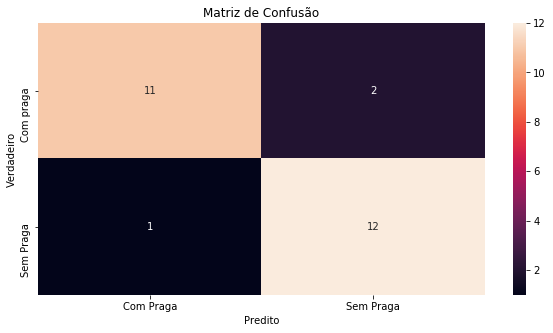

In [74]:
# Matriz de Confusao
matriz_confusao = confusion_matrix(y_id_praga_teste.values, result_rf_praga)

# Mapa com Seaborn
plt.figure(figsize=(10,5))
ax= plt.subplot()
sns.heatmap(matriz_confusao, annot=True, ax = ax);

ax.set_xlabel('Predito');
ax.set_ylabel('Verdadeiro'); 
ax.set_title('Matriz de Confusão'); 
ax.xaxis.set_ticklabels(['Com Praga', 'Sem Praga']); 
ax.yaxis.set_ticklabels(['Com praga', 'Sem Praga']);
plt.savefig("matriz_confusao_praga.png", dpi=150) 


### Salvar o modelo via Pickle

In [75]:
# Nome do arquivo que será salvo o modelo
nome_arquivo_praga = 'modelos/rf_train_modelo_identificacao_praga.sav'

# Dump do modelo
pickle.dump(modelo_svm_praga, open(nome_arquivo_praga, 'wb'))

---------------------

## 6.3 - Identificação de tipos de pragas

In [76]:
# Carregar os dados
dados_tipo_praga = pd.read_csv('data/conj_vdd_treino_identificacao_tipo_praga.csv')

# Embaralhar os dados
dados_tipo_praga = dados_tipo_praga.sample(n = 256) 

# Excluir e resetar as colunas que não são importantes
dados_tipo_praga = dados_tipo_praga.drop('Unnamed: 0', 1)
dados_tipo_praga = dados_tipo_praga.drop('index', 1)

print(dados_tipo_praga)

#------Features------
X_id_tipo_praga = dados_tipo_praga.iloc[:, 0: len(dados_tipo_praga.columns)-1]
y_id_tipo_praga = dados_tipo_praga.iloc[:, len(dados_tipo_praga.columns)-1:len(dados_tipo_praga.columns)]

#------Normalização das Features------
scaler = Normalizer()
X_id_tipo_praga = scaler.fit_transform(X_id_tipo_praga)

        f1     f2     f3     f4      f5      f6      f7      f8   clear  tipo
215  244.0  301.0  378.0  492.0   600.0   677.0   726.0   857.0  4123.0   3.0
183  322.0  431.0  556.0  704.0   876.0   832.0  1236.0  1345.0  6623.0   2.0
192  265.0  342.0  433.0  561.0   695.0   734.0   831.0  1020.0  4696.0   3.0
159  228.0  283.0  375.0  479.0   585.0   650.0   750.0   889.0  3667.0   2.0
37   294.0  365.0  429.0  569.0   684.0   731.0   763.0   898.0  5126.0   0.0
..     ...    ...    ...    ...     ...     ...     ...     ...     ...   ...
189  268.0  345.0  425.0  542.0   620.0   672.0   746.0   852.0  4664.0   2.0
70   439.0  567.0  747.0  946.0  1116.0  1284.0  1555.0  1975.0  8107.0   1.0
88   445.0  584.0  773.0  922.0  1143.0  1237.0  1580.0  2017.0  8316.0   1.0
104  423.0  566.0  689.0  996.0  1094.0  1320.0  1557.0  1880.0  8374.0   1.0
42   331.0  463.0  533.0  692.0   837.0   979.0  1058.0  1271.0  7789.0   0.0

[256 rows x 10 columns]


-------------

### 6.3.1 - Otimização de Hiperparâmetros do Random Forest

In [77]:
# Busca pelos melhores parâmetros para se usar no RF
#melhores_parametros_RF(X_id_tipo_praga,y_id_tipo_praga)

Melhores parâmetros para RF:
- n_estimators: 200
- min_samples_split: 5
- min_samples_leaf: 3
- max_features: 3
- max_depth: 90
- bootstrap: True

Tempo de Execução: 59.1min finished

In [78]:
# Comparação entre os melhores parâmetros encontrados do RF com o default
comparacao_RF(X_id_praga,
              y_id_praga,
              n_estimators = 200, 
              min_samples_split = 5, 
              min_samples_leaf = 3, 
              max_features = 3, 
              max_depth = 90, 
              bootstrap=True) 

-----RF SEM OTIMIZAÇÃO------
--------------------
acuracia: 0.8260869565217391
precisao: 0.874811782420478
recall: 0.8260869565217391
f1-score: 0.851104846889565
erro: 0.17391304347826086
--------------------
-----RF COM OTIMIZAÇÃO-----
--------------------
acuracia: 0.8260869565217391
precisao: 0.8522329333071021
recall: 0.8260869565217391
f1-score: 0.8388932576813063
erro: 0.17391304347826086
--------------------


1

### 6.3.2 - Otimização de Hiperparâmetros do SVM

In [79]:
# Busca pelos melhores parâmetros para se usar no SVM
#melhores_parametros_SVM(X_id_tipo_praga,y_id_tipo_praga)

Melhores parâmetros para o SVM:
- C: 100
- Gamma: 100 
- Kernel: rbf
- decision_function_shape: ovo
- shrinking: True

Tempo de Execução: 11.4s finished

In [80]:
comparacao_SVM(X_id_praga, 
               y_id_praga, 
               100, 
               100, 
               'rbf', 
               'ovo', 
               True)

-----SVM SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.43478260869565216
precisao: 0.1890359168241966
recall: 0.43478260869565216
f1-score: 0.2635046113306983
erro: 0.5652173913043478
--------------------
-----SVM COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.9130434782608695
precisao: 0.9130434782608695
recall: 0.9130434782608695
f1-score: 0.9130434782608695
erro: 0.08695652173913043
--------------------


1

### 6.3.3 - Otimização de Hiperparâmetros do DT

In [81]:
# Busca pelos melhores parâmetros para se usar no DT
#melhores_parametros_DT(X_id_tipo_praga,y_id_tipo_praga)

Melhores parâmetros para o DT:
- criterion: gini
- max_depth: 728

Tempo de Execução: 42.2s finished

In [82]:
comparacao_DT(X_id_tipo_praga, 
              y_id_tipo_praga,
             'gini',
              728)

-----DT SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.75
precisao: 0.7655677655677656
recall: 0.75
f1-score: 0.7641237604905076
erro: 0.9015384615384616
--------------------
-----DT COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.7692307692307693
precisao: 0.7956959706959706
recall: 0.7692307692307693
f1-score: 0.7873037136009651
erro: 0.7453846153846153
--------------------


1

### 6.3.4 - Otimização de Hiperparâmetros do NB

In [83]:
# Busca pelos melhores parâmetros para se usar no NB
#melhores_parametros_NB(X_id_tipo_praga,y_id_tipo_praga)

Melhores parâmetros para o NB:
 - var_smoothing: 0.00009111627561154887
 
Tempo de Execução: 2.2s finished




In [84]:
comparacao_NB(X_id_tipo_praga, 
              y_id_tipo_praga,
             0.00009111627561154887)

-----NB SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.6730769230769231
precisao: 0.6657086247086248
recall: 0.6730769230769231
f1-score: 0.6656817582660279
erro: 0.8623076923076922
--------------------
-----NB COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.6730769230769231
precisao: 0.6657086247086248
recall: 0.6730769230769231
f1-score: 0.6656817582660279
erro: 0.8623076923076922
--------------------


1

### 6.3.5 - Otimização de Hiperparâmetros do RL

In [85]:
# Busca pelos melhores parâmetros para se usar no RL
#melhores_parametros_RL(X_id_tipo_praga,y_id_tipo_praga)

Melhores parâmetros para a RL:
- C: 50
- penalty: l1
- multi_class: ovr
- solver: liblinear

Tempo de execução: 19.6s finished

In [86]:
comparacao_RL(X_id_tipo_praga, 
              y_id_tipo_praga,
              50,
              'l1', 
              'ovr', 
              'liblinear')

-----RL SEM OTIMIZAÇÂO-----
--------------------
acuracia: 0.3269230769230769
precisao: 0.23531135531135527
recall: 0.3269230769230769
f1-score: 0.27044096513123056
erro: 2.002307692307692
--------------------
-----RL COM OTIMIZAÇÂO-----
--------------------
acuracia: 0.7061538461538461
precisao: 0.7173223443223443
recall: 0.7061538461538461
f1-score: 0.71103327128402
erro: 0.7307692307692307
--------------------


--------------------

### 6.3.6 - Avaliação na base de teste e validação estatística quanto aos outros classificadores

In [87]:
# Carregar os dados
dados_tipo_praga_teste = pd.read_csv('data/conj_vdd_teste_identificacao_tipo_praga.csv')

# Embaralhar os dados
dados_tipo_praga_teste = dados_tipo_praga_teste.sample(n = 32) 

# Excluir e resetar as colunas que não são importantes
dados_tipo_praga_teste = dados_tipo_praga_teste.drop('Unnamed: 0', 1)
dados_tipo_praga_teste = dados_tipo_praga_teste.drop('index', 1)

print(dados_tipo_praga_teste)

#------Features------
X_id_tipo_praga_teste = dados_tipo_praga_teste.iloc[:, 0: len(dados_tipo_praga_teste.columns)-1]
y_id_tipo_praga_teste = dados_tipo_praga_teste.iloc[:, len(dados_tipo_praga_teste.columns)-1:len(dados_tipo_praga_teste.columns)]

#------Normalização das Features------
scaler = Normalizer()
X_id_tipo_praga_teste = scaler.fit_transform(X_id_tipo_praga_teste)

       f1     f2     f3      f4      f5      f6      f7      f8   clear  tipo
22  271.0  340.0  412.0   531.0   612.0   651.0   696.0   848.0  4648.0   2.0
0   378.0  480.0  591.0   736.0   931.0  1014.0  1076.0  1303.0  9209.0   0.0
24  272.0  342.0  430.0   553.0   696.0   722.0   795.0   981.0  4841.0   3.0
30  266.0  325.0  415.0   536.0   666.0   732.0   782.0   954.0  4644.0   3.0
12  407.0  521.0  687.0   905.0  1079.0  1176.0  1553.0  1736.0  8282.0   1.0
8   452.0  597.0  820.0   936.0  1180.0  1257.0  1628.0  2043.0  8756.0   1.0
15  418.0  528.0  686.0   942.0  1093.0  1246.0  1574.0  1781.0  8238.0   1.0
6   350.0  468.0  577.0   709.0   841.0   981.0  1021.0  1262.0  6608.0   0.0
17  342.0  472.0  581.0   699.0   854.0   994.0  1044.0  1365.0  7430.0   2.0
10  438.0  580.0  775.0   956.0  1221.0  1266.0  1636.0  2038.0  8947.0   1.0
28  326.0  404.0  501.0   665.0   829.0   921.0   933.0  1229.0  5825.0   3.0
18  317.0  428.0  536.0   674.0   794.0   830.0   961.0  1190.0 

In [88]:
#  Criação do Dataframe com resultados dos classificadores
colunas = ['tipo', 'acurácia', 'precisão', 'recall', 'f1score']
df_resultado_tipo_praga = pd.DataFrame(columns = colunas)

# Criação do Dataframe com os valores de saída preditos
colunas = ['y_rf', 'y_dt', 'y_svm', 'y_rl', 'y_nb']
df_valores_preditos_tipo_praga = pd.DataFrame(columns = colunas)

### RF

In [89]:
# Criação do modelo
modelo_rf_tipo_praga = RandomForestClassifier(n_estimators = 200, min_samples_split = 5, 
                                              min_samples_leaf = 3, max_features = 3, 
                                              max_depth = 90, bootstrap=True)
            
# Treinamento do modelo
modelo_rf_tipo_praga = modelo_rf_tipo_praga.fit(X_id_tipo_praga, y_id_tipo_praga.values)

# Prevendo os valores de y
result_rf_tipo_praga = modelo_rf_tipo_praga.predict(X_id_tipo_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_tipo_praga_teste.values, result_rf_tipo_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_rf_tipo_praga.score(X_id_tipo_praga_teste, y_id_tipo_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_tipo_praga.loc[0, 'tipo'] = 'RF'
df_resultado_tipo_praga.loc[0, 'acurácia'] = acuracia
df_resultado_tipo_praga.loc[0, 'precisão'] = metricas[0]
df_resultado_tipo_praga.loc[0, 'recall'] = metricas[1]
df_resultado_tipo_praga.loc[0,'f1score'] = metricas[2]


# Incluir os valores preditos pelo RF
df_valores_preditos_tipo_praga['y_rf'] = result_rf_tipo_praga

### DT

In [90]:
# Criação do modelo
modelo_dt_tipo_praga = DecisionTreeClassifier(criterion = 'gini', max_depth = 728)

# Treinamento do modelo
modelo_dt_tipo_praga = modelo_dt_tipo_praga.fit(X_id_tipo_praga, y_id_tipo_praga.values)

# Prevendo os valores de y
result_dt_tipo_praga = modelo_dt_tipo_praga.predict(X_id_tipo_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_tipo_praga_teste.values, result_dt_tipo_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_dt_tipo_praga.score(X_id_tipo_praga_teste, y_id_tipo_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_tipo_praga.loc[1, 'tipo'] = 'DT'
df_resultado_tipo_praga.loc[1, 'acurácia'] = acuracia
df_resultado_tipo_praga.loc[1, 'precisão'] = metricas[0]
df_resultado_tipo_praga.loc[1, 'recall'] = metricas[1]
df_resultado_tipo_praga.loc[1,'f1score'] = metricas[2]


# Incluir os valores preditos pelo DT
df_valores_preditos_tipo_praga['y_dt'] = result_rf_tipo_praga

### SVM

In [91]:
# Criação do modelo
modelo_svm_tipo_praga = SVC(C= 100, gamma= 100, kernel= 'rbf', decision_function_shape = 'ovo', shrinking = True)

# Treinamento do modelo
modelo_svm_tipo_praga = modelo_svm_tipo_praga.fit(X_id_tipo_praga, y_id_tipo_praga.values)

# Prevendo os valores de y
result_svm_tipo_praga = modelo_svm_tipo_praga.predict(X_id_tipo_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_tipo_praga_teste.values, result_svm_tipo_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_svm_tipo_praga.score(X_id_tipo_praga_teste, y_id_tipo_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_tipo_praga.loc[2, 'tipo'] = 'SVM'
df_resultado_tipo_praga.loc[2, 'acurácia'] = acuracia
df_resultado_tipo_praga.loc[2, 'precisão'] = metricas[0]
df_resultado_tipo_praga.loc[2, 'recall'] = metricas[1]
df_resultado_tipo_praga.loc[2,'f1score'] = metricas[2]


# Incluir os valores preditos pelo SVM
df_valores_preditos_tipo_praga['y_svm'] = result_svm_tipo_praga

### RL

In [92]:
# Criação do modelo
modelo_rl_tipo_praga = LogisticRegression(C = 50, penalty = 'l1', multi_class= 'ovr', solver= 'liblinear')

# Treinamento do modelo
modelo_rl_tipo_praga = modelo_rl_tipo_praga.fit(X_id_tipo_praga, y_id_tipo_praga.values)

# Prevendo os valores de y
result_rl_tipo_praga = modelo_rl_tipo_praga.predict(X_id_tipo_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_tipo_praga_teste.values, result_rl_tipo_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_rl_tipo_praga.score(X_id_tipo_praga_teste, y_id_tipo_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_tipo_praga.loc[3, 'tipo'] = 'RL'
df_resultado_tipo_praga.loc[3, 'acurácia'] = acuracia
df_resultado_tipo_praga.loc[3, 'precisão'] = metricas[0]
df_resultado_tipo_praga.loc[3, 'recall'] = metricas[1]
df_resultado_tipo_praga.loc[3,'f1score'] = metricas[2]


# Incluir os valores preditos pelo RL
df_valores_preditos_tipo_praga['y_rl'] = result_rl_tipo_praga

### NB

In [93]:
# Criação do modelo
modelo_nb_tipo_praga = GaussianNB(var_smoothing = 0.00009111627561154887)

# Treinamento do modelo
modelo_nb_tipo_praga = modelo_nb_tipo_praga.fit(X_id_tipo_praga, y_id_tipo_praga.values)

# Prevendo os valores de y
result_nb_tipo_praga = modelo_nb_tipo_praga.predict(X_id_tipo_praga_teste)

# Métricas de avaliação
metricas = precision_recall_fscore_support(y_id_tipo_praga_teste.values, result_nb_tipo_praga, average='macro')

# Acurácia do Modelo
acuracia = modelo_nb_tipo_praga.score(X_id_tipo_praga_teste, y_id_tipo_praga_teste.values)

# Inclusão das métricas de avaliação
df_resultado_tipo_praga.loc[4, 'tipo'] = 'NB'
df_resultado_tipo_praga.loc[4, 'acurácia'] = acuracia
df_resultado_tipo_praga.loc[4, 'precisão'] = metricas[0]
df_resultado_tipo_praga.loc[4, 'recall'] = metricas[1]
df_resultado_tipo_praga.loc[4,'f1score'] = metricas[2]


# Incluir os valores preditos pelo NB
df_valores_preditos_tipo_praga['y_nb'] = result_nb_tipo_praga

### Dataframe com os resultados dos classificadores

In [94]:
# Salvar em um arquivo CSV
df_resultado_tipo_praga.to_csv('data/df_resultado_tipo_praga.csv')

df_resultado_tipo_praga.head()

,tipo,acurácia,precisão,recall,f1score
0,RF,0.84375,0.847222,0.84375,0.840336
1,DT,0.78125,0.786364,0.78125,0.773279
2,SVM,0.875,0.874008,0.875,0.872794
3,RL,0.78125,0.76746,0.78125,0.76704
4,NB,0.6875,0.694399,0.6875,0.683788


### Dataframe com os valores preditos

In [95]:
print(df_valores_preditos_tipo_praga)

# Salvar em um arquivo CSV
df_valores_preditos_tipo_praga.to_csv('data/df_valores_preditos_tipo_praga.csv')

    y_rf  y_dt  y_svm  y_rl  y_nb
0    2.0   2.0    2.0   2.0   2.0
1    0.0   0.0    0.0   0.0   0.0
2    3.0   3.0    3.0   3.0   2.0
3    3.0   3.0    3.0   3.0   3.0
4    1.0   1.0    1.0   1.0   0.0
5    1.0   1.0    1.0   1.0   1.0
6    1.0   1.0    1.0   1.0   1.0
7    0.0   0.0    2.0   2.0   0.0
8    0.0   0.0    2.0   0.0   0.0
9    1.0   1.0    1.0   1.0   1.0
10   3.0   3.0    3.0   3.0   2.0
11   0.0   0.0    2.0   2.0   0.0
12   3.0   3.0    3.0   3.0   3.0
13   2.0   2.0    2.0   2.0   0.0
14   0.0   0.0    0.0   1.0   1.0
15   1.0   1.0    1.0   1.0   1.0
16   3.0   3.0    3.0   3.0   3.0
17   3.0   3.0    3.0   3.0   3.0
18   3.0   3.0    3.0   3.0   3.0
19   0.0   0.0    0.0   2.0   0.0
20   2.0   2.0    3.0   3.0   3.0
21   1.0   1.0    0.0   1.0   2.0
22   1.0   1.0    1.0   1.0   1.0
23   2.0   2.0    2.0   2.0   2.0
24   0.0   0.0    0.0   0.0   0.0
25   1.0   1.0    1.0   1.0   1.0
26   0.0   0.0    0.0   0.0   0.0
27   2.0   2.0    2.0   2.0   2.0
28   2.0   2.0

-------------------------

### Validação Estatística

### Análise de Distribuição

#### -> Teste utilizado: Shapiro Wilk

#### -> H0(Hipótese nula): A amostra segue a distribuição normal, se o p-valor >= 0.05
    
#### -> H1: A amostra não segue a distribuição normal, se o p-valor < 0.05.

In [96]:
# Carregar os resultados da análise de distribuição feita no R
analise_distribuicao_praga = pd.read_csv('data/shapiro-wilk-test-tipo-praga.csv')

analise_distribuicao_praga.head()

,Unnamed: 0,svm,rl,rf,dt,nv
0,1,0.000602,0.000694,0.000194,0.000186,0.661188


Como a maioria das correlações de Pearson foram inferiores a 0.05, logo a amostra é não paramétrica!

### Análise de Variável Independente

#### -> H0(Hipótese nula): Todos os algoritmos são equivalentes, se o p-valor >= 0.05;
#### -> H1: Os algoritmos têm diferença, se o p-valor < 0.05.

In [97]:
# Carregar os resultados da análise de variável independente feita no R
var_independente_praga = pd.read_csv('data/t-test-tipo-praga.csv')

var_independente_praga.head()

,Unnamed: 0,svm,dt,rf,rl
0,dt,1,NaN,NaN,NaN
1,rf,1,1.0,NaN,NaN
2,rl,1,1.0,1.0,NaN
3,nv,1,1.0,1.0,1.0


Não há diferença estatística entre os modelos

-------------------

### 6.3.7 - Criação do Modelo de identificação de pragas

### O SVM foi escolhido, pois nos experimentos de validação quanto a base de testes demontrou-se o mais promissor

### Matriz de Confusão do SVM

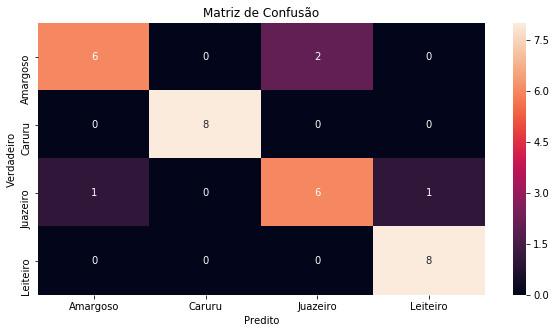

In [102]:
# Matriz de Confusao
matriz_confusao = confusion_matrix(y_id_tipo_praga_teste.values, result_svm_tipo_praga)

# Mapa com Seaborn
plt.figure(figsize=(10,5))
ax= plt.subplot()
sns.heatmap(matriz_confusao, annot=True, ax = ax);

ax.set_xlabel('Predito');
ax.set_ylabel('Verdadeiro'); 
ax.set_title('Matriz de Confusão'); 
ax.xaxis.set_ticklabels(['Amargoso', 'Caruru', 'Juazeiro', 'Leiteiro']); 
ax.yaxis.set_ticklabels(['Amargoso', 'Caruru', 'Juazeiro', 'Leiteiro']);
plt.savefig("matriz_confusao_tipo_praga.png", dpi=150) 


### Salvar o modelo via Pickle

In [103]:
# Nome do arquivo que será salvo o modelo
nome_arquivo_praga = 'modelos/svm_train_modelo_identificacao_tipo_praga.sav'

# Dump do modelo
pickle.dump(modelo_svm_tipo_praga, open(nome_arquivo_praga, 'wb'))

------------------------

## 7 - Aplicação da Solução para Identificação de Pragas em Colheitas nas bases de teste 

In [104]:
# Carregar os dados
# - SUBSTITUIR O ARQUIVO CSV DE TESTE PELO O QUE DESEJA SER AVALIADO
dados_praga_teste = pd.read_csv('data/conj_vdd_teste_identificacao_praga.csv')

# Embaralhar os dados
dados_praga_teste = dados_praga_teste.sample(n = 26) 

# Excluir e resetar as colunas que não são importantes
dados_praga_teste = dados_praga_teste.drop('Unnamed: 0', 1)
dados_praga_teste = dados_praga_teste.drop('index', 1)

#print(dados_praga_teste)

#------Features------
X_id_praga_teste = dados_praga_teste.iloc[:, 0: len(dados_praga_teste.columns)-1]
y_id_praga_teste = dados_praga_teste.iloc[:, len(dados_praga_teste.columns)-1:len(dados_praga_teste.columns)]

#------Normalização das Features------
scaler = Normalizer()
X_id_praga_teste = scaler.fit_transform(X_id_praga_teste)

#------Carregar o modelo de identificação de pragas------
model_identificacao_praga = joblib.load('modelos/rf_train_modelo_identificacao_praga.sav')

#------Carreegar o modelo de identificação de tipo de pragas------
model_identificacao_tipo_praga = joblib.load('modelos/svm_train_modelo_identificacao_tipo_praga.sav')

-----------------------------

### Dataframe com os resultados

In [105]:
#  Criação do Dataframe com resultados sintetizados
colunas = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'clear', 'saída', 'tipo']
df_resultado_predicao = pd.DataFrame(columns = colunas)

#------Experimentos com os dados da base de teste------
cont = 0
for index, row in dados_praga_teste.iterrows():
    print('Plantação: ', cont)
    print('Dados dos Sensores: f1 = {} | f2 = {} | f3 = {} | f4 = {} | f5 = {} | f6 = {} | f7 = {} | f8 = {} | clear = {}'.format(row.f1, row.f2, row.f3, row.f4, row.f5, row.f6, row.f7, row.f8, row.clear))
    
    # Inserindo informações no Dataframe dos resultados
    df_resultado_predicao.loc[cont, 'f1'] = row.f1
    df_resultado_predicao.loc[cont, 'f2'] = row.f2
    df_resultado_predicao.loc[cont, 'f3'] = row.f3
    df_resultado_predicao.loc[cont, 'f4'] = row.f4
    df_resultado_predicao.loc[cont, 'f5'] = row.f5
    df_resultado_predicao.loc[cont, 'f6'] = row.f6
    df_resultado_predicao.loc[cont, 'f7'] = row.f7
    df_resultado_predicao.loc[cont, 'f8'] = row.f8
    df_resultado_predicao.loc[cont, 'clear'] = row.clear
    
    # Prevendo se a plantação tem praga ou não
    resultado_id_praga = model_identificacao_praga.predict([X_id_praga_teste[cont]])
    
    df_resultado_predicao.loc[cont, 'saída'] = resultado_id_praga[0]
    
    # Caso a plantação tenha praga, logo identificar qual tipo de praga
    if resultado_id_praga[0] == 1.0:
        
        # Prevendo qual tipo de praga está presente na plantação
        resultado_id_tipo_praga = model_identificacao_tipo_praga.predict([X_id_praga_teste[cont]])
        
        # Praga do tipo Amargoso
        if resultado_id_tipo_praga[0] == 0.0:
            print('**Plantação com invasores do cultivo principal**')
            print('A plantação selecionada tem praga do tipo Amargoso!')
            
            df_resultado_predicao.loc[cont, 'tipo'] = "A"
            
        # Praga do tipo Caruru
        elif resultado_id_tipo_praga[0] == 1.0:
            print('**Plantação com invasores do cultivo principal**')
            print('A plantação selecionada tem praga do tipo Caruru!')
            
            df_resultado_predicao.loc[cont, 'tipo'] = "C"
            
        # Praga do tipo Juazeiro
        elif resultado_id_tipo_praga[0] == 2.0:
            print('**Plantação com invasores do cultivo principal**')
            print('A plantação selecionada tem praga do tipo Juazeiro!')
            
            df_resultado_predicao.loc[cont, 'tipo'] = "J"
            
        # Praga do tipo Leiteiro
        else:
            print('**Plantação com invasores do cultivo principal**')
            print('A plantação selecionada tem praga do tipo Leiteiro!')
            
            df_resultado_predicao.loc[cont, 'tipo'] = "L"
    else:
        print('**Plantação do cultivo principal**')
        print('A Plantação selecionada não tem praga!')
        
        df_resultado_predicao.loc[cont, 'tipo'] = "SEM PRAGA"
        
    print('\n')
    cont+=1

Plantação:  0
Dados dos Sensores: f1 = 232.0 | f2 = 279.0 | f3 = 355.0 | f4 = 484.0 | f5 = 572.0 | f6 = 631.0 | f7 = 696.0 | f8 = 795.0 | clear = 3792.0
**Plantação do cultivo principal**
A Plantação selecionada não tem praga!


Plantação:  1
Dados dos Sensores: f1 = 240.0 | f2 = 311.0 | f3 = 405.0 | f4 = 528.0 | f5 = 630.0 | f6 = 702.0 | f7 = 842.0 | f8 = 990.0 | clear = 3854.0
**Plantação com invasores do cultivo principal**
A plantação selecionada tem praga do tipo Juazeiro!


Plantação:  2
Dados dos Sensores: f1 = 326.0 | f2 = 423.0 | f3 = 583.0 | f4 = 737.0 | f5 = 929.0 | f6 = 1029.0 | f7 = 1248.0 | f8 = 1512.0 | clear = 7718.0
**Plantação do cultivo principal**
A Plantação selecionada não tem praga!


Plantação:  3
Dados dos Sensores: f1 = 322.0 | f2 = 447.0 | f3 = 570.0 | f4 = 727.0 | f5 = 919.0 | f6 = 997.0 | f7 = 1306.0 | f8 = 1521.0 | clear = 7792.0
**Plantação com invasores do cultivo principal**
A plantação selecionada tem praga do tipo Amargoso!


Plantação:  4
Dados dos S

In [106]:
# Dataframe com os resultados sintetizados
print(df_resultado_predicao)

     f1   f2   f3    f4    f5    f6    f7    f8 clear saída       tipo
0   232  279  355   484   572   631   696   795  3792     0  SEM PRAGA
1   240  311  405   528   630   702   842   990  3854     1          J
2   326  423  583   737   929  1029  1248  1512  7718     0  SEM PRAGA
3   322  447  570   727   919   997  1306  1521  7792     1          A
4   248  311  385   510   624   685   741   887  3988     1          L
5   269  382  483   664   774   850  1083  1308  5917     1          C
6   289  348  446   596   724   862  1016  1186  4851     1          A
7   279  354  480   567   764   706   876   974  5791     0  SEM PRAGA
8   265  331  441   542   714   699   832   947  5219     0  SEM PRAGA
9   235  300  362   484   559   592   643   740  3901     1          L
10  244  300  373   511   615   692   734   884  4418     0  SEM PRAGA
11  239  290  389   490   610   685   779   918  4067     1          J
12  268  336  446   549   715   700   842   954  5264     0  SEM PRAGA
13  47

-----------------

## 8 - Relatório de Desenvolvimento

### 1 - Seleção de Algoritmo/Técnica de IA

- Para o modelo de detecção de pragas o algoritmo escolhido foi o Random Forest (88.46% de acurácia), já para modelo de detecção de tipos de pragas o algoritmo escolhido foi o Support Vector Machine (88.69% de acurácia). Desse modo, a escolha foi baseada coforme o resultado obtido nos testes de avaliação em comparação com outros algoritmos e testes estatísticos.


### 2 - Critérios de Seleção de Dados Treinamento

- Balanceamento da Base de Dados de Treinamento para o modelo de detecção de pragas, sendo que a base tem 90% da quantidade de dados da menor proporção de dados dentre os rótulos dispostos.

- Base de Treinamento do modelo de identificação de pragas: 230 exemplos, sendo 115 do tipo 0 e sendo 115 do tipo 1.

- Base de Treinamento do modelo de identificação de tipo de pragas: 256 exemplos, sendo 64 do tipo A, sendo 64 do tipo C, sendo 64 do tipo J, sendo 64 do tipo L.



### 3 - Critérios de Seleção de Dados Validação

- Balanceamento da Base de Dados de Treinamento para o modelo de detecção de pragas, sendo que a base tem 10% da quantidade de dados da menor proporção de dados dentre os rótulos dispostos.

- Base de Treinamento do modelo de identificação de pragas: 26 exemplos, sendo 13 do tipo 0 e sendo 13 do tipo 1.

- Base de Treinamento do modelo de identificação de tipo de pragas: 32 exemplos, sendo 8 do tipo A, sendo 8 do tipo C, sendo 8 do tipo J, sendo 8 do tipo L.

### 4 - Critérios de Análise Prática dos Resultados

- Métricas de Avaliação:
    - Acurácia;
    - Precisão; 
    - Recall; 
    - F1-Score.
- Matriz de Confusão;
- Teste Estatístico:
    - Análise de Distribuição;
    - Análise de Variável Independente.

### 5 - Desenvolvimento

- Pré-processamento;
- Análise de Dados;
- Balanceamento e criação do conjunto de treinamento e teste para o modelo de identificação de pragas;
- Balanceamento e criação do conjunto de treinamento e teste para o modelo de identificação de tipos de pragas;
- Otimização de Hiperparâmetros;
- Criação do modelo de identificação de pragas;
- Validação do modelode de identificação de pragas;
- Testes Estatísticos para o modelo de identificação de pragas;
- Criação do modelo de identificação de tipos de pragas;
- Validação do modelode de identificação de tipo de pragas;
- Testes Estatísticos para o modelo de identificação de tipos de pragas;
- Aplicação dos modelos desenvolvidos em conjunto na base de teste.

### 6 - Problemas enfrentados

Quantidade de dados é pouca e meu computador não possui uma placa de vídeo, logo não consegui usufruir do processamento dos dados via GPU (CUDA).

### 7 - Técnicas utilizadas para enfrentar e resolver os problemas enfrentados

- Pré-processamento;
- Análise de Dados;
- Balanceamento da base de dados;
- Criação de conjunto verdade;
- Otimização de Hiperparâmetros;
- Desenvolvimento dos modelos de classificação;
- Validação dos modelos de classificação;
- Testes Estatísticos.